In [1]:
#Importing the library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load data
data = pd.read_csv('AirPassengers.csv')

In [3]:
#Basic Checks
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [5]:
data.shape

(144, 2)

In [6]:
data.columns

Index(['Month', 'Passengers'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
data.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [9]:
#Parsing the data and using date column as a index

data = pd.read_csv('AirPassengers.csv',parse_dates=[0],index_col='Month')

#parsing_dates used for convert datatype into date time and 0 is column locqation
#index_col used for set column as index

In [10]:
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# EDA

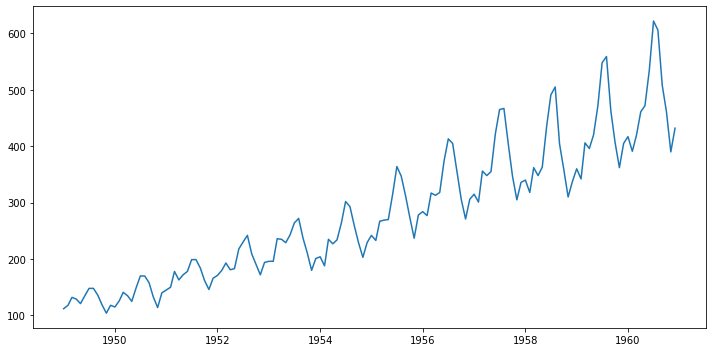

In [11]:
plt.figure(figsize=(10,5),facecolor='white')
plt.plot(data)
plt.tight_layout()

- Increses trend in no of passenger.

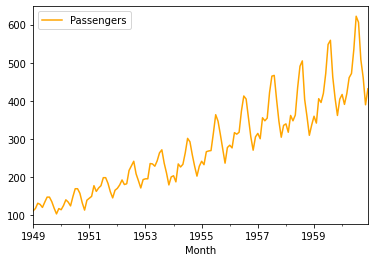

In [12]:
data.plot(color='orange')
plt.show()

## Model Creation  
## AR(Dont use this model)

In [13]:
#Plotting the auto Correlation plot
from statsmodels.graphics.tsaplots import plot_acf

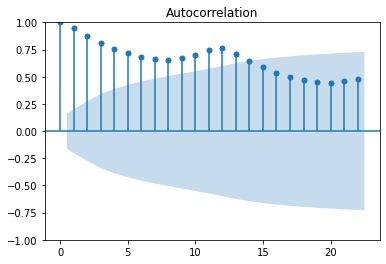

In [14]:
plot_acf(data)
plt.show()

- From auto corrleation plot it is clear that the given series is non- stationary

In [15]:
#making stationary by taking difference of 1

data1 = data.diff(periods=1)  #diff --------> used difference function 

#this means calcilating the change in your rows(s)/column(s) over set numbers of periods or simpliy ,
# pandas diff will be subtract 1 cell value from another cell value within the same index

In [16]:
data1  # loading the data

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [17]:
data1 = data1.iloc[1:]  # columns from one to end

In [18]:
data1

,Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


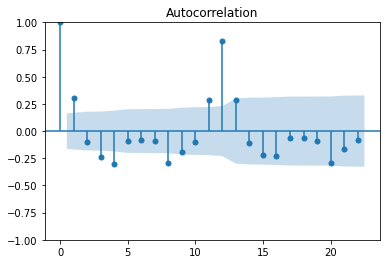

In [19]:
plot_acf(data1)
plt.show()

- Not become a statinory

In [20]:
data2 = data1.diff(periods=1)  ## used 2nd time

In [21]:
data2

,Passengers
Month,
1949-02-01,NaN
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0
...,...
1960-08-01,-103.0
1960-09-01,-82.0
1960-10-01,51.0


In [22]:
#making new veriable to store data2
data3 = data2.iloc[1:]

In [23]:
data2

,Passengers
Month,
1949-02-01,NaN
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0
...,...
1960-08-01,-103.0
1960-09-01,-82.0
1960-10-01,51.0


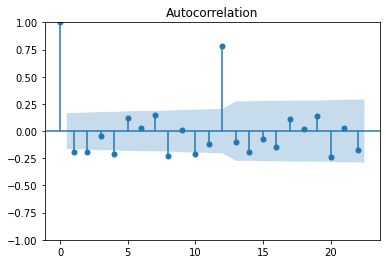

In [24]:
plot_acf(data3)
plt.show()

- Now the series become a stationary

## Create training and testing data

In [25]:
data3.shape

(142, 1)

In [26]:
train = data3[:100]  # from 0th rows to 100 rows for training
test = data3[100:]   #from 100 above remaing rows for testing

In [27]:
train.shape

(100, 1)

In [28]:
test.shape

(42, 1)

In [29]:
#information about data-type and null values
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 1949-03-01 to 1957-06-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


## Apply Auto Regressive model

In [36]:
from statsmodels.tsa.ar_model import AutoReg

In [38]:
#Model creation
ar_model = AutoReg(train,lags=1, seasonal=True, period=11)   #creating object and passing training data
ar_model_fit = ar_model.fit()  # training model

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [39]:
## prediction on model
predict = ar_model_fit.predict(start = 100, end=143) 

In [40]:
predict

1957-07-01   -24.936275
1957-08-01     4.526080
1957-09-01    -0.094973
1957-10-01    15.104307
1957-11-01     3.208917
1957-12-01    -4.520185
1958-01-01    -3.787833
1958-02-01     3.113970
1958-03-01    -3.556368
1958-04-01     3.222453
1958-05-01    -1.222288
1958-06-01    -7.531431
1958-07-01    -0.421932
1958-08-01     1.311693
1958-09-01    14.704406
1958-10-01     3.322604
1958-11-01    -4.552505
1958-12-01    -3.778645
1959-01-01     3.111358
1959-02-01    -3.555626
1959-03-01     3.222242
1959-04-01    -1.222228
1959-05-01    -7.531448
1959-06-01    -0.421927
1959-07-01     1.311692
1959-08-01    14.704407
1959-09-01     3.322604
1959-10-01    -4.552505
1959-11-01    -3.778645
1959-12-01     3.111358
1960-01-01    -3.555626
1960-02-01     3.222242
1960-03-01    -1.222228
1960-04-01    -7.531448
1960-05-01    -0.421927
1960-06-01     1.311692
1960-07-01    14.704407
1960-08-01     3.322604
1960-09-01    -4.552505
1960-10-01    -3.778645
1960-11-01     3.111358
1960-12-01    -3

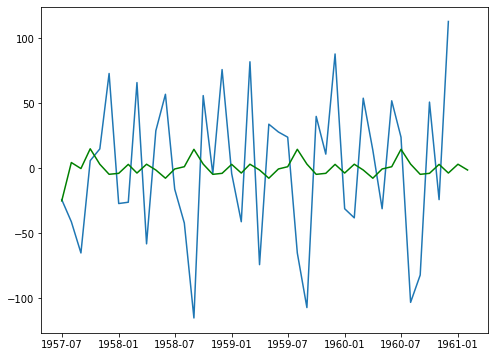

In [41]:
plt.figure(figsize=(8,6))
plt.plot(test)
plt.plot(predict,color='green')
plt.show()
#graph of test vs prediction  ## green one will be prediction

## ARIMA Model 

In [42]:
#importing library
from statsmodels.tsa.arima.model import ARIMA

In [43]:
#traing and testing data created upper model no need to create double
train.shape

(100, 1)

In [44]:
test.shape

(42, 1)

In [45]:
#Model object creation and fitting the model

model_arima = ARIMA(train, order=(1,1,0))  ## order p,d,q   

# p--> Auto Regressive(AR)
# q--> Moving Average(MA)
# d --> difference(intermidiate)
model_arima_fit = model_arima.fit()  # trainig

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# Model Evaluation

In [46]:
print(model_arima_fit.aic)  

1021.0396389673776


In [47]:
#predicting out of sample points
forcecasting = model_arima_fit.forecast(steps = 9)

In [48]:
#forcast done unseen data
forcecasting

1957-07-01    37.765356
1957-08-01    48.751565
1957-09-01    43.323244
1957-10-01    46.005395
1957-11-01    44.680135
1957-12-01    45.334950
1958-01-01    45.011404
1958-02-01    45.171269
1958-03-01    45.092279
Freq: MS, Name: predicted_mean, dtype: float64

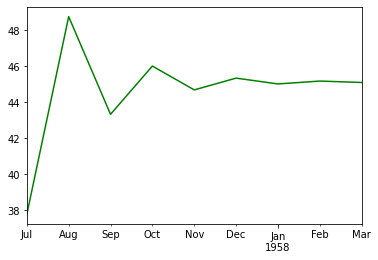

In [49]:
#ploting the forcated value
forcecasting.plot(color='green')
plt.show()

# Tuning

In [50]:
#Getting the optimal values of p,q,d
import itertools # used for itretion

p = d = q =range(0,2)  #becaues of small data

#if we have lard data then range are increase
pdq = list(itertools.product(p,d,q))  #used for cartition product to given opretion
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [51]:
#The Python try… except statement catches an exception. 
#It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
for params in pdq:
    try:
        model_arima_1 = ARIMA(train,order=params,)  # training model on various pdq values
        model_arima_fit_1 = model_arima_1.fit()   #training
        print(params,model_arima_fit_1.aic)     #printing parameter with aic value
    except:
        continue

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

(0, 0, 0) 967.913551830937
(0, 0, 1) 931.4372805505137


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

(0, 1, 0) 1046.7319001420174
(0, 1, 1) 963.8739387623483
(1, 0, 0) 963.0127961447531
(1, 0, 1) 928.7077561684616
(1, 1, 0) 1021.0396389673776
(1, 1, 1) 959.4979666282912


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

- Taking the lowest aic valu parameter.

In [52]:
#create final model with lowest aic parameter
model_arima_4 = ARIMA(train,order=(1,0,1))

model_arima_fit_4 = model_arima_4.fit() #training

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [53]:
print(model_arima_fit_4.aic)  #aic score

928.7077561684616


In [54]:
forcast1 = model_arima_fit.forecast(steps=9)
forcast1

1957-07-01    37.765356
1957-08-01    48.751565
1957-09-01    43.323244
1957-10-01    46.005395
1957-11-01    44.680135
1957-12-01    45.334950
1958-01-01    45.011404
1958-02-01    45.171269
1958-03-01    45.092279
Freq: MS, Name: predicted_mean, dtype: float64

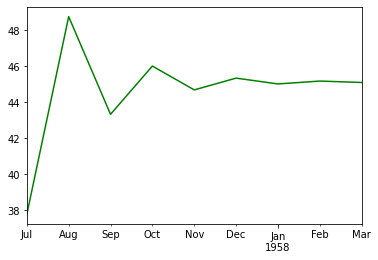

In [55]:
forcast1.plot(color='green')
plt.show()